# EDA

In [1]:
#Import packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import warnings
import statlearning
import seaborn as sns 
import matplotlib.pyplot as plt
import pylab
import sklearn.linear_model
import sklearn.neighbors
import sklearn.model_selection


sns.set(style = 'white')

In [2]:
# read the data
data = pd.read_csv('train.csv')

In [3]:
# plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)

In [4]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Create dummies for categorical variables
data['international plan'] = data['international plan'].map({'no':0, 'yes':1}).replace()
data['voice mail plan'] = data['voice mail plan'].map({'no':0, 'yes':1}).replace()
data['churn'] = data['churn'].astype(int)

In [6]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
# check for missing values
data.isnull().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

In [8]:
# check data types
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [9]:
response = data['churn']
predictors = data.drop(['churn', 'state', 'area code', 'phone number'], axis = 1)

In [10]:
descriptive = predictors.describe()
descriptive.loc['skew', :] = predictors.skew()
descriptive.loc['kurt', :] = predictors.kurt()
descriptive.round(3)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000
mean,101.065,0.097,0.277,8.099,179.775,100.436,30.562,200.980,100.114,17.084,200.872,100.108,9.039,10.237,4.479,2.765,1.563
std,39.822,0.296,0.447,13.688,54.467,20.069,9.259,50.714,19.923,4.311,50.574,19.569,2.276,2.792,2.461,0.754,1.315
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.200,33.000,1.040,0.000,0.000,0.000,0.000
25%,74.000,0.000,0.000,0.000,143.700,87.000,24.430,166.600,87.000,14.160,167.000,87.000,7.520,8.500,3.000,2.300,1.000
50%,101.000,0.000,0.000,0.000,179.400,101.000,30.500,201.400,100.000,17.120,201.200,100.000,9.050,10.300,4.000,2.780,1.000
75%,127.000,0.000,1.000,20.000,216.400,114.000,36.790,235.300,114.000,20.000,235.300,113.000,10.590,12.100,6.000,3.270,2.000
max,243.000,1.000,1.000,51.000,350.800,165.000,59.640,363.700,170.000,30.910,395.000,175.000,17.770,20.000,20.000,5.400,9.000
skew,0.097,2.726,0.999,1.265,-0.029,-0.112,-0.029,-0.024,-0.056,-0.024,0.009,0.032,0.009,-0.245,1.321,-0.245,1.091
kurt,-0.108,5.436,-1.002,-0.051,-0.020,0.243,-0.020,0.026,0.206,0.025,0.086,-0.072,0.086,0.609,3.084,0.610,1.731


0    2850
1     483
Name: churn, dtype: int64


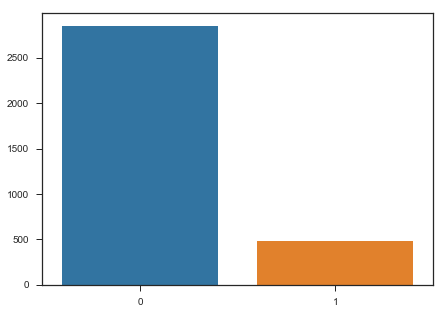

In [11]:
churn = data["churn"].value_counts()
print(churn)
sns.barplot(churn.index, churn.values)

In [12]:
#Calculate % of churning customers for each state

states = data.state.unique()

df = []

for state in states:
    state_data = data[data['state'] == state]
    name = state_data.state.unique()
    n = len(state_data)
    a = state_data.groupby('churn').count().div(n).mul(100).round(4)
    a = a['account length']
    df.append(a)
result = pd.concat(df, axis=1)

result.columns = states
result = result.T

result.sort_values(1, ascending=False).head(10)


churn,0,1
CA,73.5294,26.4706
NJ,73.5294,26.4706
TX,75.0000,25.0000
MD,75.7143,24.2857
SC,76.6667,23.3333
MI,78.0822,21.9178
MS,78.4615,21.5385
WA,78.7879,21.2121
NV,78.7879,21.2121
ME,79.0323,20.9677


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


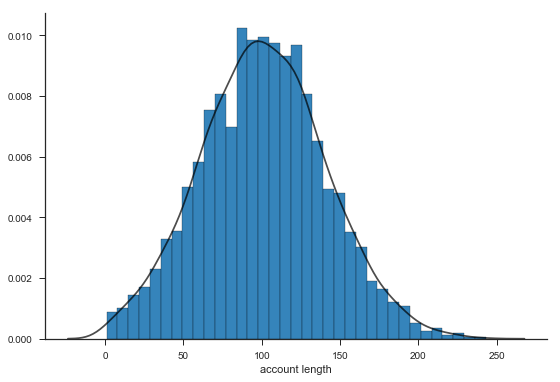

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


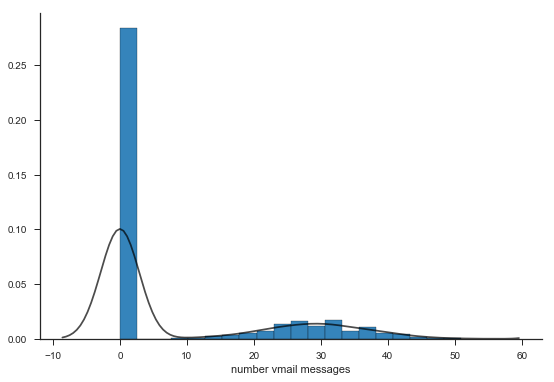

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


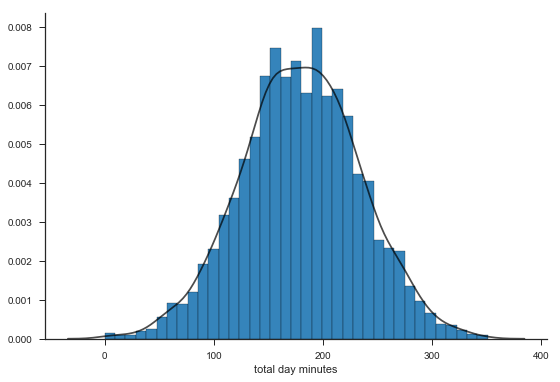

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


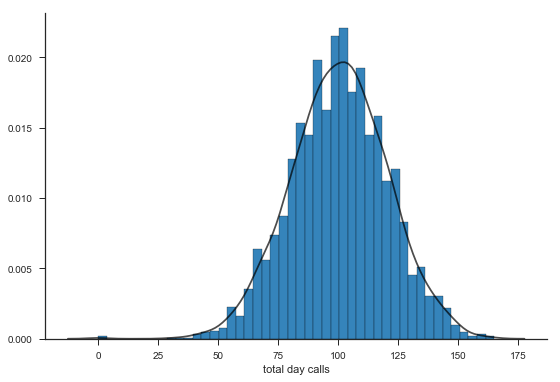

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


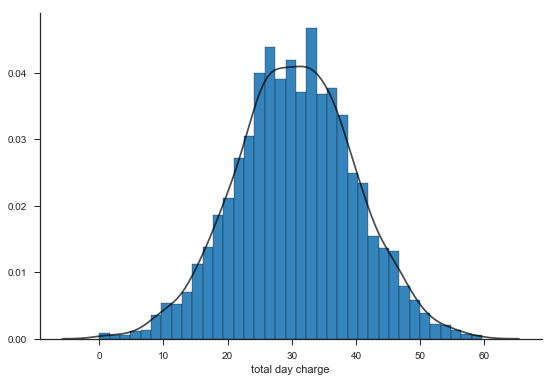

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


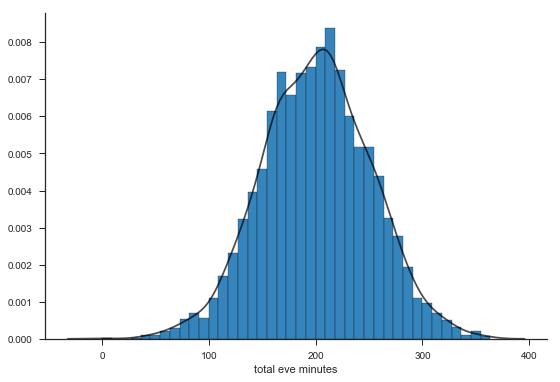

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


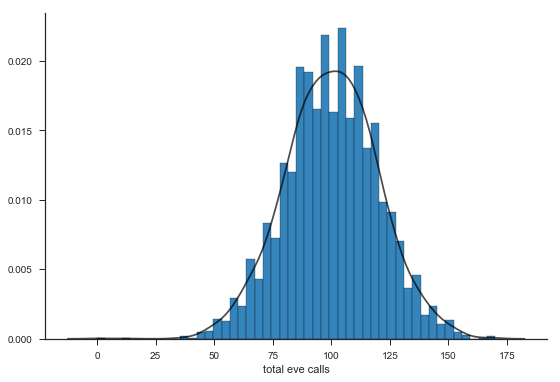

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


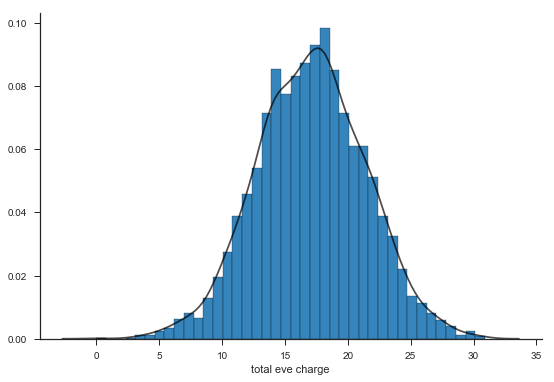

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


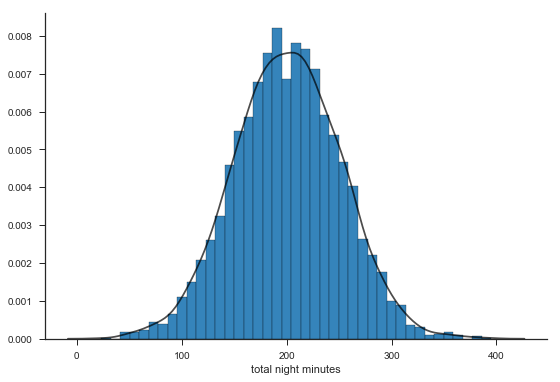

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


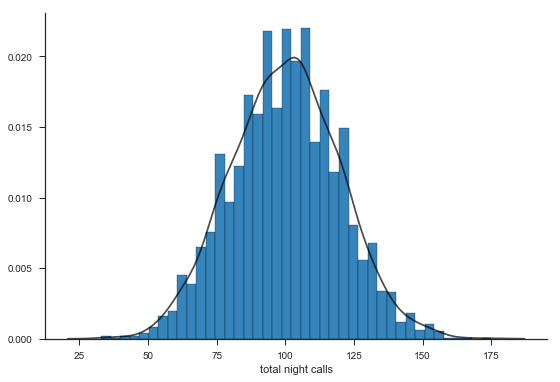

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


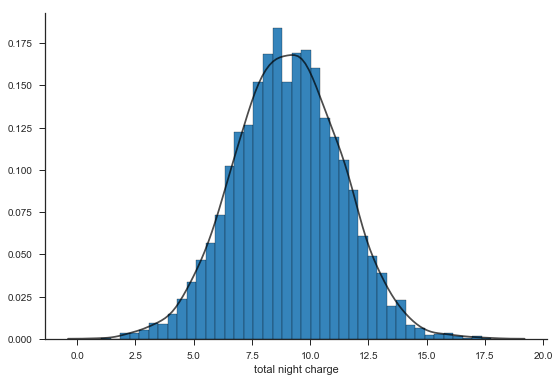

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


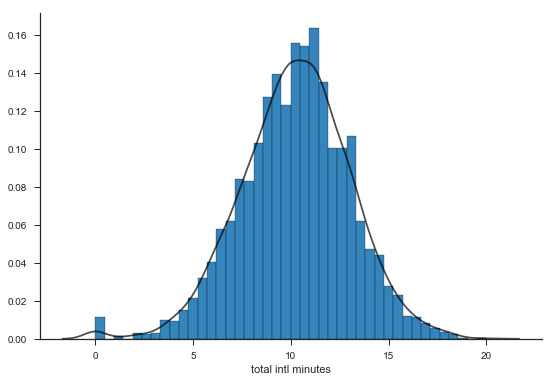

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


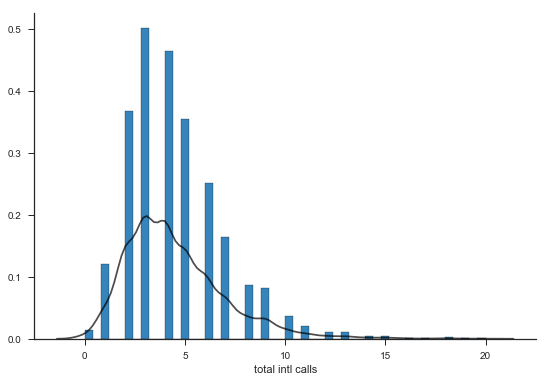

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


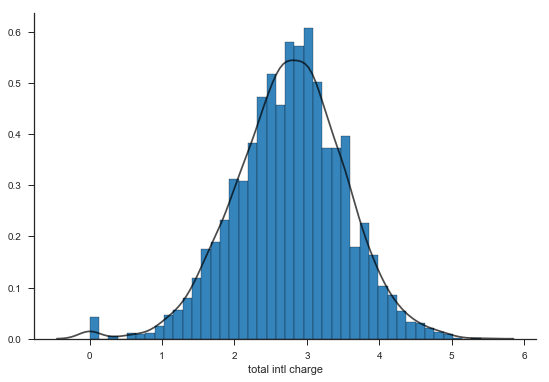

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


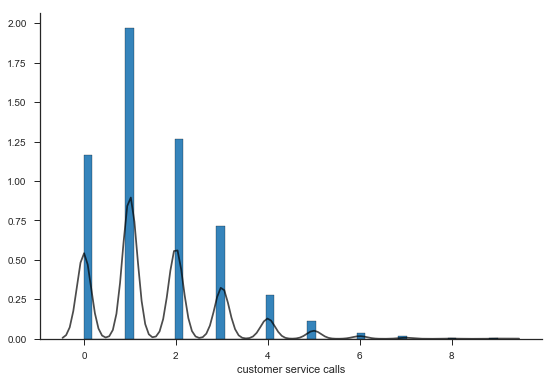

In [13]:
#plot distribution of every numeric variable in predictors

from statlearning import plot_histogram

colnames = ['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

for i in colnames:
    plot_histogram(data[i])
    plt.show()

Plotting histograms for numeric variables shows us that most of the variables are normally (or approx. normally) distributes. 
Variables of "customer service calls" and "total intl calls" are right-skewed so it might be reasonable to apply log-transformation to them to reduce the skewness.

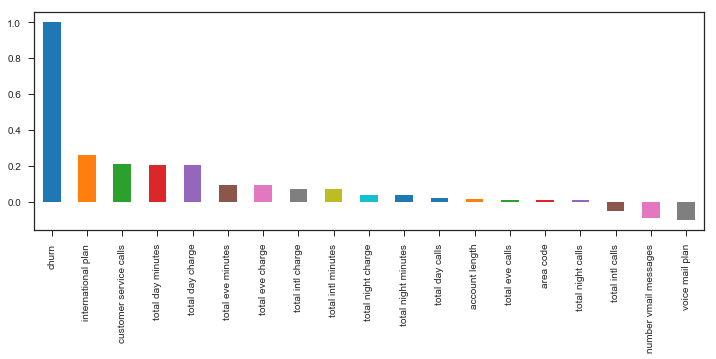

In [14]:
# Discover correlation btw churn status and predictors
plt.figure(figsize=(12,4))
data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

To explore the relationship between the numerical predictors and the respose, we use logistic regression. The results show that the "total day minutes" and "total day charge" may be associated with a higher probability of churn.

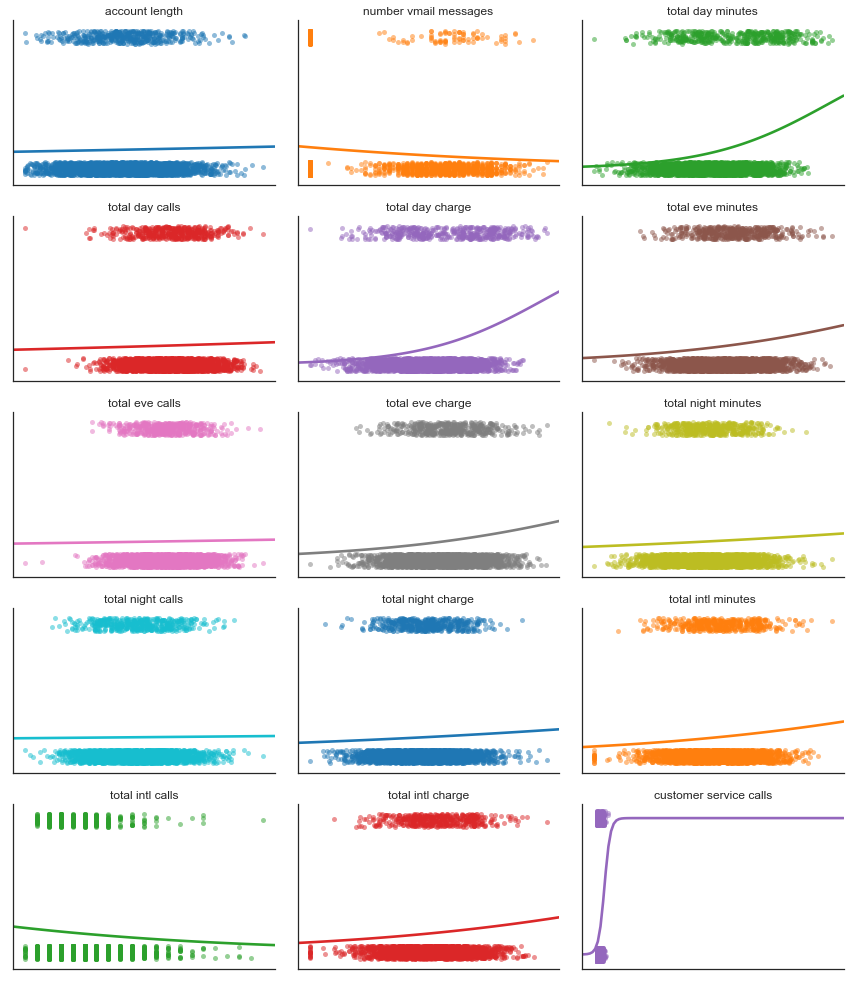

In [16]:
from statlearning import plot_logistic_regressions

plot_logistic_regressions(data[colnames], response)
plt.show()

Here are the class-conditional distributions accross the predictors.

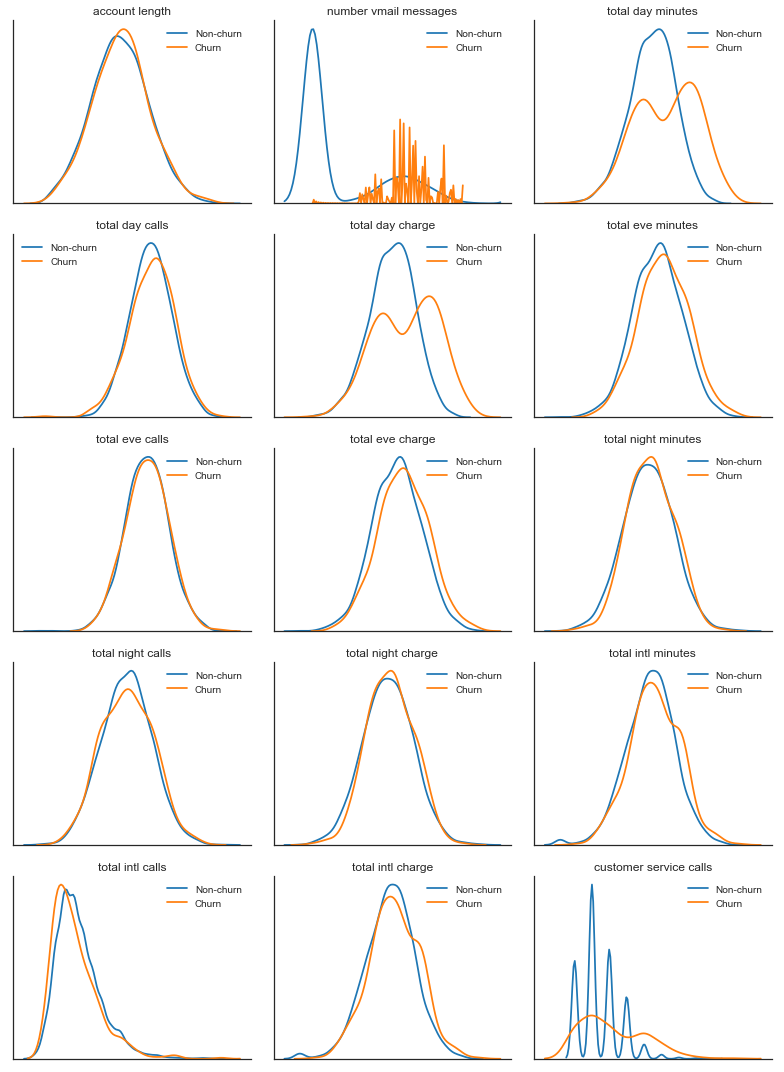

In [18]:
from statlearning import plot_conditional_distributions

plot_conditional_distributions(data[colnames], response, labels=['Non-churn', 'Churn'])
plt.show()

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV

logit_l1 = LogisticRegressionCV(Cs = 20, penalty='l1', solver='liblinear', scoring='neg_log_loss', cv = 10)
logit_l1.fit(predictors, response)

logit_l2 = LogisticRegressionCV(Cs = 20, penalty='l2', scoring='neg_log_loss', cv = 10)
logit_l2.fit(predictors, response)

LogisticRegressionCV(Cs=20, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='neg_log_loss', solver='lbfgs', tol=0.0001,
           verbose=0)

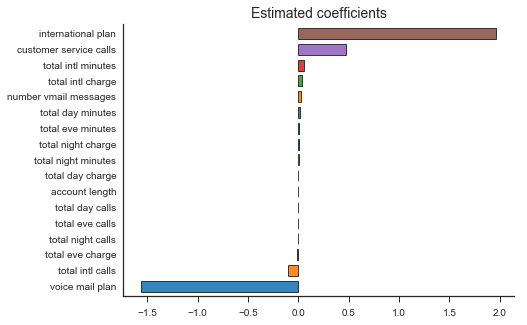

In [20]:
#plot coefficients for logreg regularised with ridge

from statlearning import plot_coefficients

plot_coefficients(logit_l2, predictors.columns)
plt.show()

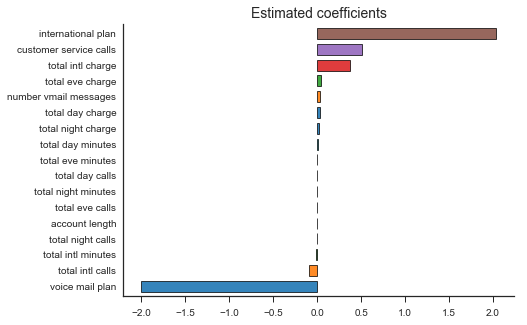

In [21]:
#plot coefficients for logreg regularised with lasso
plot_coefficients(logit_l1, predictors.columns)
plt.show()

# KNN classifier

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

def knn_cv(predictors, response):
    
    neighbours = np.arange(1, 51)
    best_score = 0
    
    for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors = k ,  metric='mahalanobis', metric_params={'V': predictors.cov()})
        score = np.mean(cross_val_score(knn, predictors, response, cv=10, scoring = 'accuracy'))
        if score >= best_score:
            best = knn
            best_score = score
    
    return best
        
knn = knn_cv(predictors, response) 
knn.fit(predictors, response)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mahalanobis',
           metric_params={'V':                         account length  international plan  voice mail plan  \
account length             1585.800121            0.291437         0.051995
international plan            0.291437            0.087544         0.000795
voice mail plan               0.051995     ...
total intl charge                    -0.009593
customer service calls                1.730517  },
           n_jobs=1, n_neighbors=5, p=2, weights='uniform')